In [1]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from google.colab import drive

## Dataset

In [5]:
drive.mount('/content/gdrive', force_remount=True)
path = '/content/gdrive/MyDrive/Final Project/Dataset/Tomato/'

Mounted at /content/gdrive


In [6]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64 

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   validation_split = .2)

train_batches = train_datagen.flow_from_directory(
    path,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    subset = 'training',
    shuffle = True, seed = 666
)

val_batches = train_datagen.flow_from_directory(
    path,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    subset = 'validation',
    shuffle = True, seed = 666
)

Found 10389 images belonging to 6 classes.
Found 2595 images belonging to 6 classes.


In [8]:
labels = train_batches.class_indices
classes_num = len(train_batches.class_indices)

In [9]:
labels

{'Tomato_BacterialSpot': 0,
 'Tomato_EarlyBlight': 1,
 'Tomato_Healthy': 2,
 'Tomato_LateBlight': 3,
 'Tomato_MosaicVirus': 4,
 'Tomato_YellowLeafCurlVirus': 5}

In [ ]:
import matplotlib.pyplot as plt

def plotimg(images):
  fig, axes = plt.subplots(1, 5, figsize=(40, 40))
  for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.show()

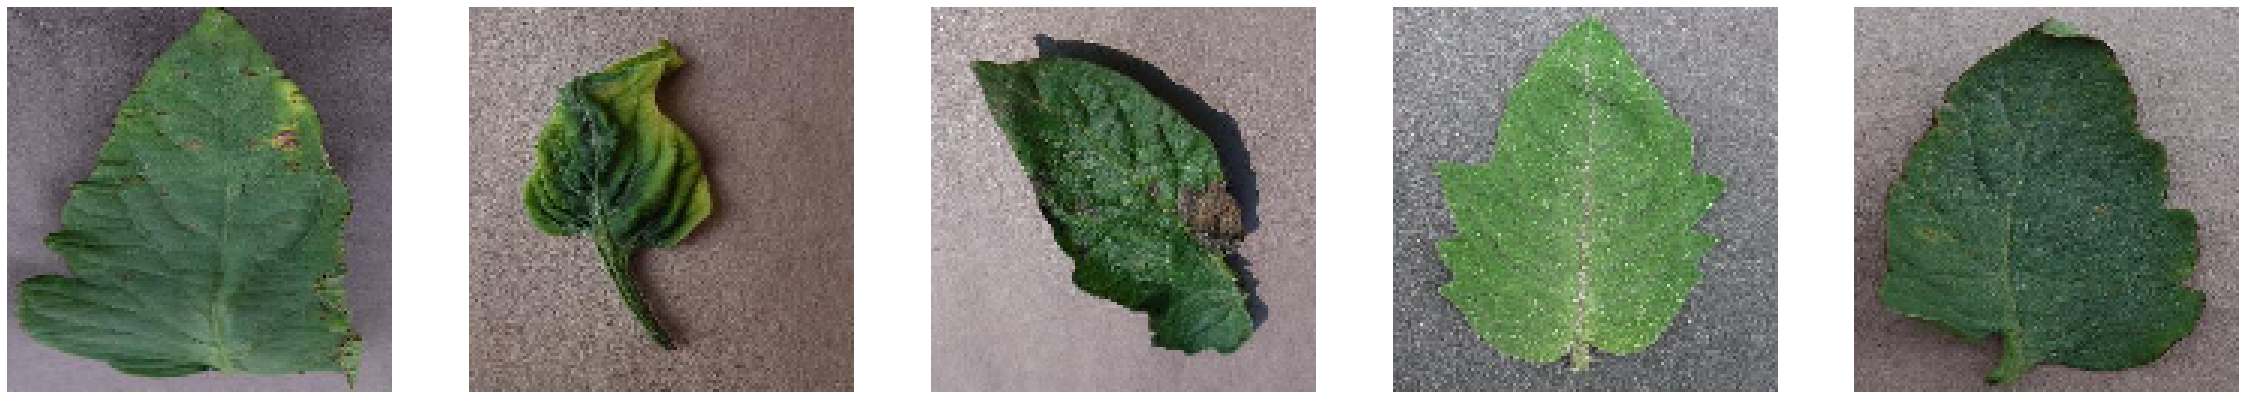

[0. 5. 3. 2. 0.]


In [ ]:
imgs, labels = train_batches[0]
plotimg(imgs)
print(labels[:5])

## Model

In [10]:
model_tomato = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(classes_num, activation='softmax')
])    

model_tomato.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0

In [11]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model_tomato.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

## Train & Evaluate

In [12]:
# Train the model
history = model_tomato.fit(
            x = train_batches,
            validation_data = val_batches,
            epochs = 20,
            verbose = 1,
            #validation_steps = 5,
            #steps_per_epoch = 16,
            )

Epoch 1/20
163/163 [==============================] - 3979s 24s/step - loss: 1.3629 - accuracy: 0.4896 - val_loss: 1.0113 - val_accuracy: 0.6347
Epoch 2/20
163/163 [==============================] - 33s 205ms/step - loss: 0.8781 - accuracy: 0.6879 - val_loss: 0.7027 - val_accuracy: 0.7823
Epoch 3/20
163/163 [==============================] - 33s 205ms/step - loss: 0.6430 - accuracy: 0.7811 - val_loss: 0.5085 - val_accuracy: 0.8239
Epoch 4/20
163/163 [==============================] - 33s 203ms/step - loss: 0.5204 - accuracy: 0.8215 - val_loss: 0.4547 - val_accuracy: 0.8432
Epoch 5/20
163/163 [==============================] - 34s 207ms/step - loss: 0.4681 - accuracy: 0.8322 - val_loss: 0.4081 - val_accuracy: 0.8516
Epoch 6/20
163/163 [==============================] - 33s 202ms/step - loss: 0.4293 - accuracy: 0.8479 - val_loss: 0.3926 - val_accuracy: 0.8582
Epoch 7/20
163/163 [==============================] - 33s 201ms/step - loss: 0.4012 - accuracy: 0.8551 - val_loss: 0.3676 - val_ac

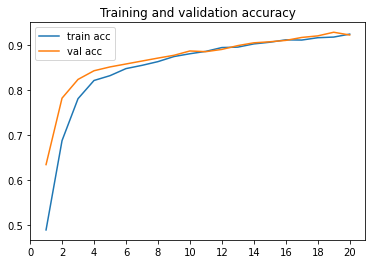

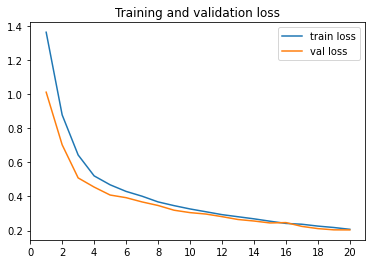

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve history as lists
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='val acc')
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc)+1, 2))
plt.legend(['train acc', 'val acc'])
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.title('Training and validation loss')
plt.legend(['train loss', 'val loss'])
plt.xticks(np.arange(0, len(acc)+1, 2))
plt.show()

In [22]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_tomato.predict(images, batch_size=64)
  print(fn)
  print(list(labels)[np.argmax(classes[0])])
  # print(classes[0])

Saving IU-TYLCV_img_1.jpg to IU-TYLCV_img_1.jpg
Saving Tomato-Leaf-Curl-1600x800.jpg to Tomato-Leaf-Curl-1600x800.jpg
Saving TYLCV leaflet cropped.png to TYLCV leaflet cropped.png
IU-TYLCV_img_1.jpg
Tomato_YellowLeafCurlVirus
Tomato-Leaf-Curl-1600x800.jpg
Tomato_YellowLeafCurlVirus
TYLCV leaflet cropped.png
Tomato_LateBlight


In [ ]:
list(labels)[np.argmax(classes[0])]

'Apple_cedar_rust'

## Save & Convert Model

In [23]:
# save model
model_tomato.save('/content/model/planticure_model_tomato.h5')

In [24]:
tf.saved_model.save(model_tomato, '/content/model/')

INFO:tensorflow:Assets written to: /content/model/assets


In [25]:
# Convert model to tflite
tflite_model = tf.lite.TFLiteConverter.from_saved_model('/content/model/').convert()

In [26]:
# Save tflite model
import pathlib

pathlib.Path('/content/model/planticure_model_tomato.tflite').write_bytes(tflite_model)

836748

In [27]:
# Save labels
with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))

#### Quantization

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

In [ ]:
import pathlib

pathlib.Path('/content/model/planticure_quantized_model.tflite').write_bytes(tflite_quantized_model)

3416192

In [29]:
try:
    from google.colab import files
    files.download('/content/model/planticure_model_tomato.tflite')
    #files.download('/content/model/planticure_quantized_model.tflite')
    files.download('/content/model/planticure_model_tomato.h5')
    #files.download('/content/saved_model.pb')
    files.download('/content/labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>